In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer as si
import seaborn as sns

In [5]:
d=pd.read_csv("BlackFriday.csv")
d.isnull().sum()



User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
del d["Product_Category_2"]
del d["Product_Category_3"]

In [8]:
d.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [9]:
for i in d.columns:
    print(i,d[i].nunique(),d[i].unique())

User_ID 5891 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID 3623 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender 2 ['F' 'M']
Age 7 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation 21 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category 3 ['A' 'C' 'B']
Stay_In_Current_City_Years 5 ['2' '4+' '3' '1' '0']
Marital_Status 2 [0 1]
Product_Category_1 18 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase 17959 [ 8370 15200  1422 ... 14539 11120 18426]


# Gender Column

<AxesSubplot:ylabel='None'>

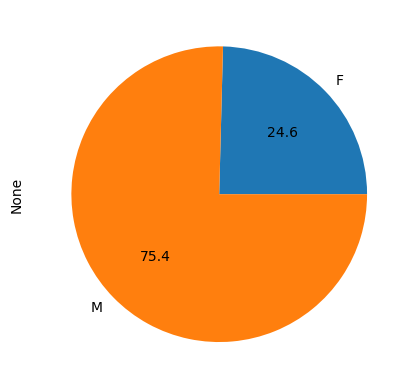

In [10]:
d.groupby("Gender").size().plot(kind="pie",autopct="%0.1f")

<AxesSubplot:ylabel='Purchase'>

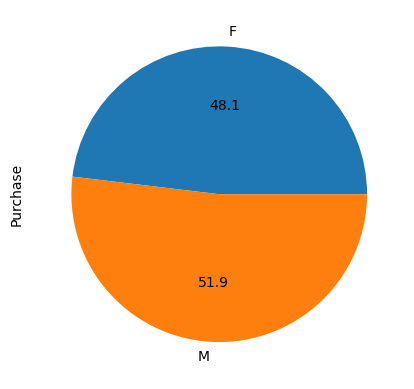

In [11]:
d.groupby("Gender").mean()["Purchase"].plot(kind="pie",autopct="%0.1f")

<AxesSubplot:ylabel='Purchase'>

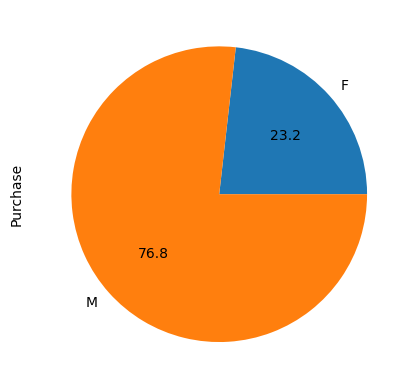

In [28]:
d.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%0.1f")

<AxesSubplot:title={'center':'purchase by age'}, xlabel='Age'>

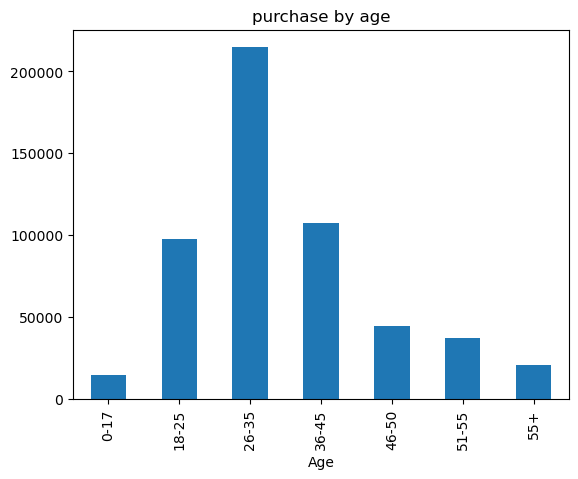

In [12]:
d.groupby("Age").size().plot(kind="bar",title="purchase by age")

In [13]:
for i in d["Age"].unique():
    print(i,len(d[d["Age"]==i]))

0-17 14707
55+ 20903
26-35 214690
46-50 44526
51-55 37618
36-45 107499
18-25 97634


<AxesSubplot:title={'center':'purchase by age'}, xlabel='Age'>

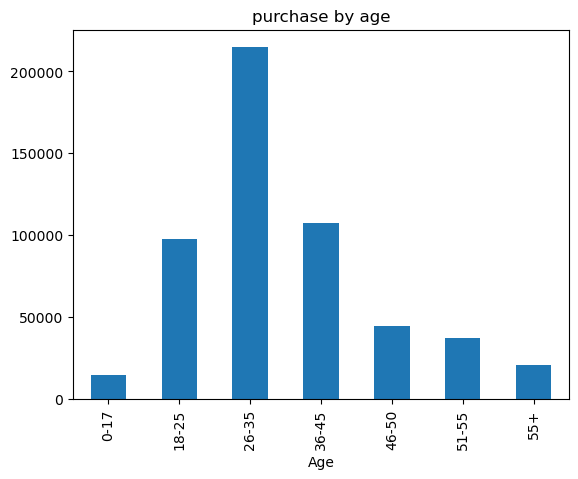

In [14]:
d.groupby("Age").size().plot(kind="bar",title="purchase by age")

In [15]:
for i in d["Age"].unique():
    print(i,":",d[d["Age"]==i]["Product_ID"].nunique())

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


<AxesSubplot:xlabel='Age'>

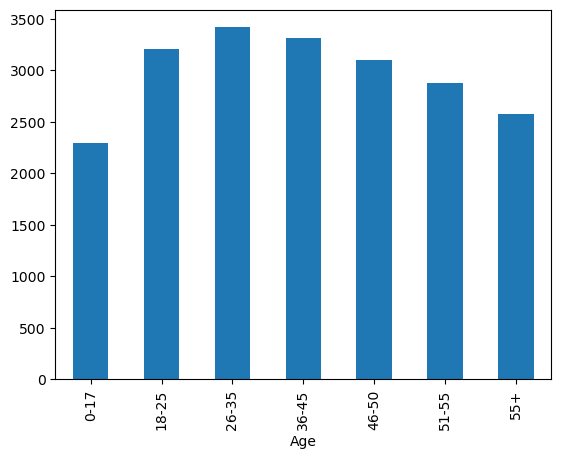

In [16]:
d.groupby("Age").nunique()["Product_ID"].plot.bar(x="Age")

<AxesSubplot:ylabel='None'>

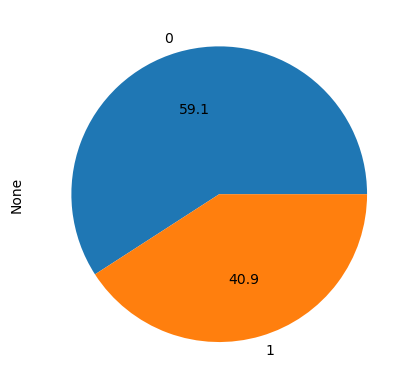

In [17]:
d.groupby("Marital_Status").size().plot(kind="pie",autopct="%0.1f")

In [18]:
l=[]
for i in range(len(d)):
    l.append(d["Gender"][i]+'_'+str(d["Marital_Status"][i]))
d["MaritalGender"] =l   
    

In [19]:
d.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

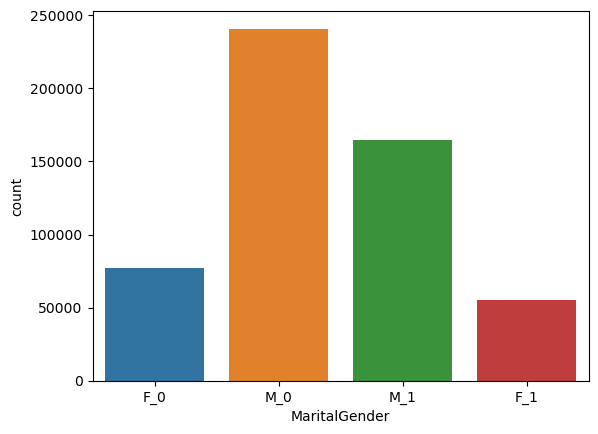

In [10]:
sns.countplot(x=d["MaritalGender"])

<AxesSubplot:xlabel='MaritalGender'>

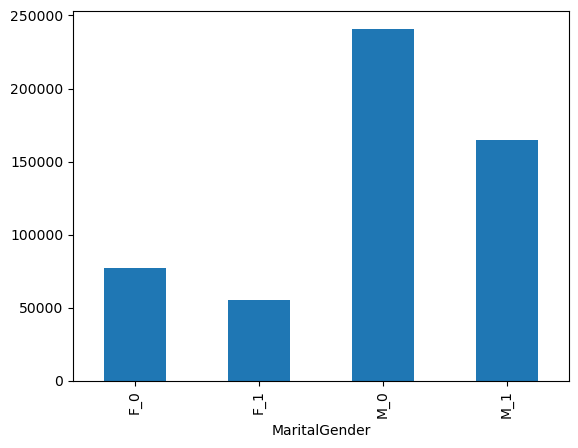

In [22]:
d.groupby("MaritalGender").size().plot(kind="bar")

<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

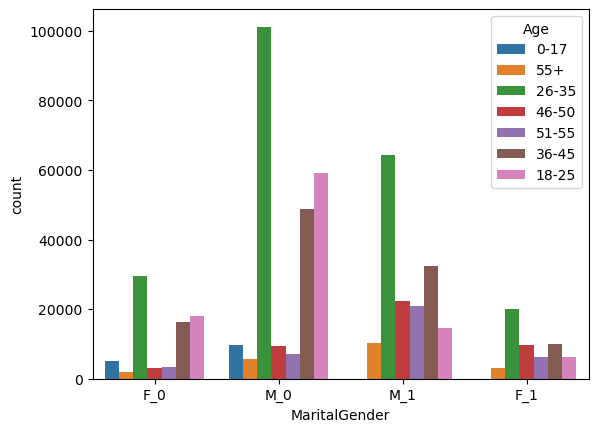

In [23]:
sns.countplot(x="MaritalGender",hue="Age",data=d)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

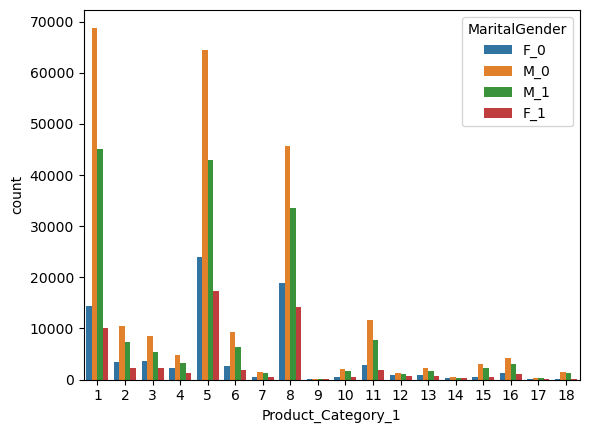

In [24]:
sns.countplot(x=d["Product_Category_1"],hue=d["MaritalGender"],)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

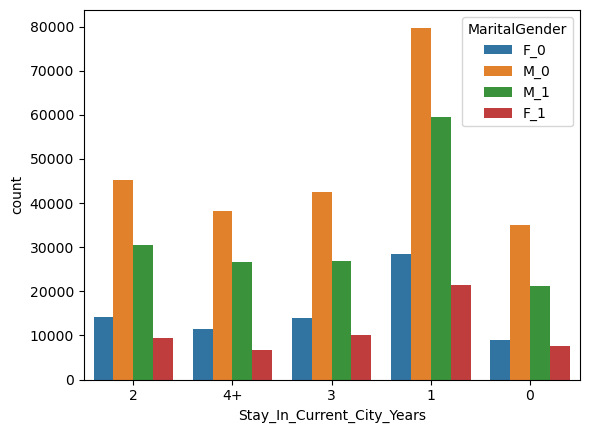

In [25]:
sns.countplot(x=d["Stay_In_Current_City_Years"],hue=d["MaritalGender"],)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

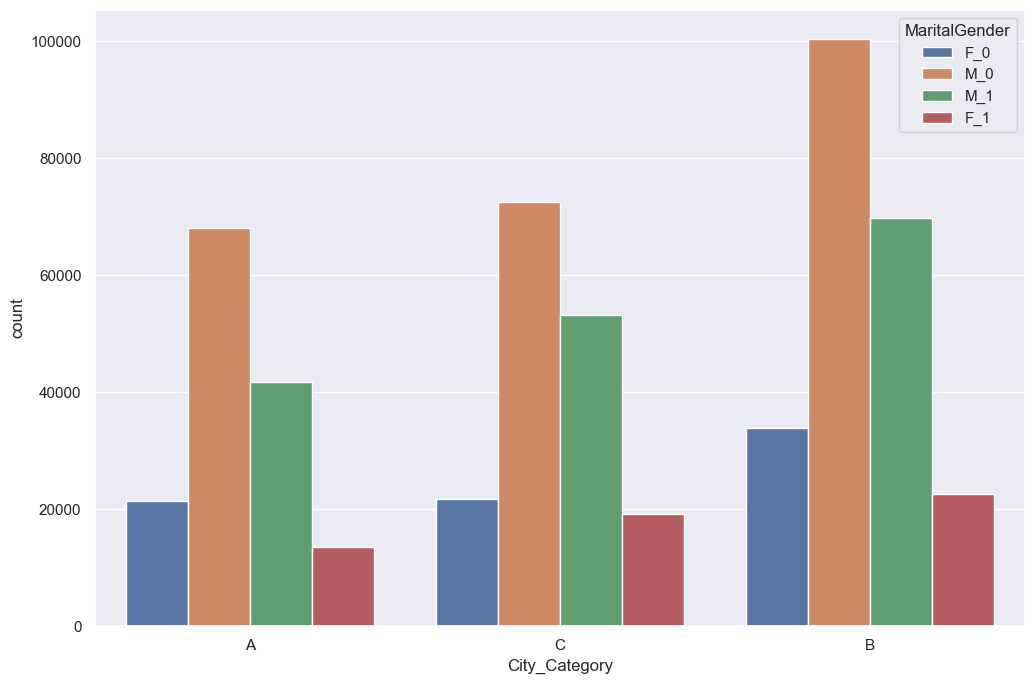

In [19]:
sns.set(rc={"figure.figsize":(12,8)})
sns.countplot(x=d["City_Category"],hue=d["MaritalGender"])

<AxesSubplot:ylabel='None'>

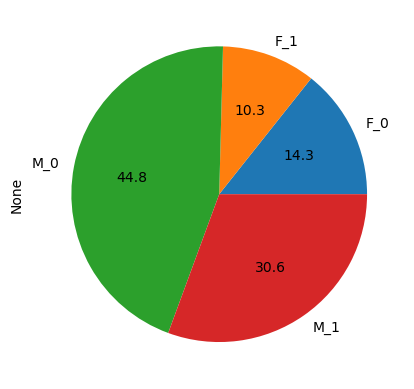

In [26]:
d.groupby("MaritalGender").size().plot(kind="pie",autopct="%0.1f")